[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://githubtocolab.com/crunchdao/quant-venture-capital-resources/blob/main/eda.ipynb)

![cover](https://raw.githubusercontent.com/crunchdao/quant-venture-capital-resources/main/cover.jpeg)

# Simple EDA

# Set up your crunch workspace

#### STEP 1
Run this cell to install the crunch library in your workspace.
This command will create a crunch-cli folder in your workspace.

In [ ]:
%pip install crunch-cli --upgrade
!crunch setup venture-capital-portfolio-prediction . --token 1ODnZ4Wd7szb1eFxLRHZQQodCM576MU3j9trQ69d6j5DzlL3TNOCljD5EOipac3t --force

#### STEP 2
Import the crunch package and instantiate it to be able to access its functionality.

In [3]:
import crunch
crunch = crunch.load_notebook(__name__)

loaded inline runner with module: <module '__main__'>


# Data

In [4]:
import pandas as pd
# Getting the data
X_train, y_train, X_test = crunch.load_data()

download data/X_train.parquet from https://crunchdao--competition--production.s3.eu-west-1.amazonaws.com/data-releases/24/X_train.parquet
already exists: file length match
download data/y_train.parquet from https://crunchdao--competition--production.s3.eu-west-1.amazonaws.com/data-releases/24/y_train.parquet
already exists: file length match
download data/X_test.parquet from https://crunchdao--competition--production.s3.eu-west-1.amazonaws.com/data-releases/24/X_test_reduced.parquet
already exists: file length match
download data/y_test.parquet from https://crunchdao--competition--production.s3.eu-west-1.amazonaws.com/data-releases/24/y_test_reduced.parquet
already exists: file length match


In [29]:
# Feature space
print(f"The feature space is composed of {len(X_train.columns)}")
print(f"There is {X_train.date.nunique()} cross-sections in the train dataset")
print(f"There is {X_test.date.nunique()} cross-section in the test dataset")

The feature space is composed of 231
There is 36 cross-sections in the train dataset
There is 2 cross-section in the test dataset


## Missing IDs in the id Column
Some IDs are missing from the train set. A robust algorithm can recognize an entry present in both the train and test sets. To ensure the algorithm cannot overfit on a given entry, we've implemented an entry-wise split between the train and test sets, resulting in the missing IDs.

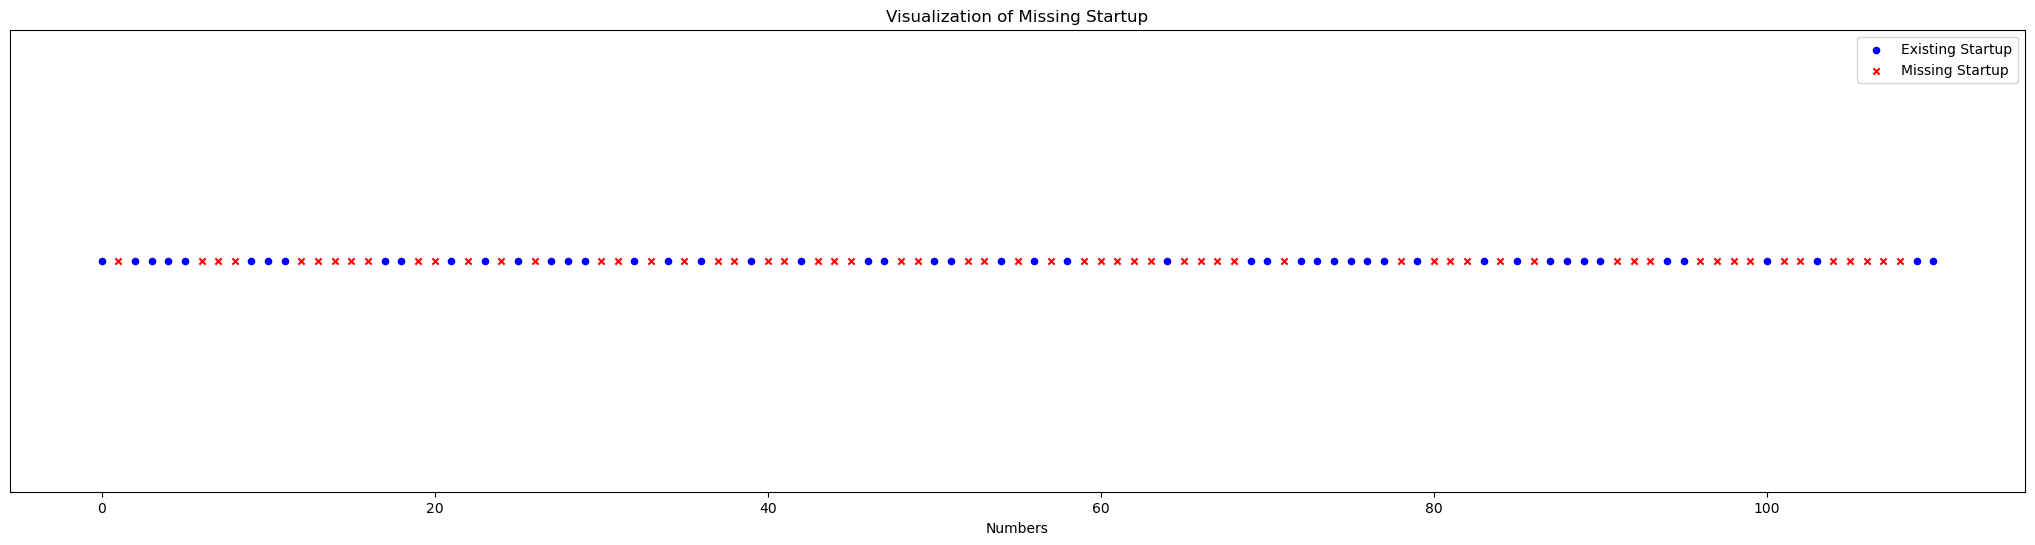

In [46]:
# Example code to visually represent missing numbers in a list
def visualize_missing_numbers(numbers):
    full_range = range(min(numbers), max(numbers) + 1)
    missing_numbers = list(set(full_range) - set(numbers))

    plt.figure(figsize=(26, 6))
    
    # Plotting the existing numbers
    plt.scatter(numbers, [1] * len(numbers), color='blue', label='Existing Startup', marker='o', s=20)

    # Plotting the missing numbers
    plt.scatter(missing_numbers, [1] * len(missing_numbers), color='red', label='Missing Startup', marker='x', s=20)

    plt.yticks([])  # Hide y-axis ticks
    plt.xlabel('Numbers')
    plt.title('Visualization of Missing Startup')
    plt.legend()
    plt.show()

# Example usage:
number_list = X_train.id.values[:50]
visualize_missing_numbers(number_list)

## Number of Entries Monitored at Each Moment of Time

Text(0.5, 1.0, 'Number of Startup monitored at each moment of time')

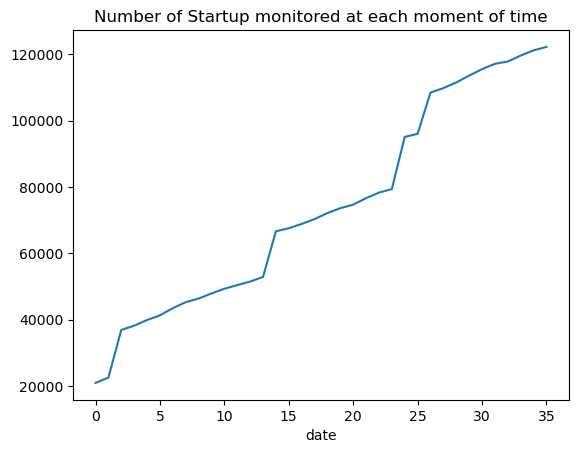

In [52]:
X_train.groupby('date').id.count().plot()
plt.title('Number of Startup monitored at each moment of time')

In [48]:
print(f"There is {X_train.isna().sum().sum()} missing entries in the training set")

The is 0 missing entries in the training set


## Describe
The distribution of the data is challenging. Event driven.

In [49]:
X_train.describe()

,date,id,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,feature_79,feature_80,feature_81,feature_82,feature_83,feature_84,feature_85,feature_86,feature_87,feature_88,feature_89,feature_90,feature_91,feature_92,feature_93,feature_94,feature_95,feature_96,feature_97,feature_98,feature_99,feature_100,feature_101,feature_102,feature_103,feature_104,feature_105,feature_106,feature_107,feature_108,feature_109,feature_110,feature_111,feature_112,feature_113,feature_114,feature_115,feature_116,feature_117,feature_118,feature_119,feature_120,feature_121,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127,feature_128,feature_129,feature_130,feature_131,feature_132,feature_133,feature_134,feature_135,feature_136,feature_137,feature_138,feature_139,feature_140,feature_141,feature_142,feature_143,feature_144,feature_145,feature_146,feature_147,feature_148,feature_149,feature_150,feature_151,feature_152,feature_153,feature_154,feature_155,feature_156,feature_157,feature_158,feature_159,feature_160,feature_161,feature_162,feature_163,feature_164,feature_165,feature_166,feature_167,feature_168,feature_169,feature_170,feature_171,feature_172,feature_173,feature_174,feature_175,feature_176,feature_177,feature_178,feature_179,feature_180,feature_181,feature_182,feature_183,feature_184,feature_185,feature_186,feature_187,feature_188,feature_189,feature_190,feature_191,feature_192,feature_193,feature_194,feature_195,feature_196,feature_197,feature_198,feature_199,feature_200,feature_201,feature_202,feature_203,feature_204,feature_205,feature_206,feature_207,feature_208,feature_209,feature_210,feature_211,feature_212,feature_213,feature_214,feature_215,feature_216,feature_217,feature_218,feature_219,feature_220,feature_221,feature_222,feature_223,feature_224,feature_225,feature_226,feature_227,feature_228,feature_229
count,2.662761e+06,2.662761e+06,2662761.0,2662761.0,2662761.0,2662761.0,2662761.0,2662761.0,2662761.0,2662761.0,2662761.0,2662761.0,2662761.0,2662761.0,2662761.0,2662761.0,2662761.0,2662761.0,2662761.0,2662761.0,2662761.0,2662761.0,2662761.0,2662761.0,2662761.0,2662761.0,2662761.0,2662761.0,2662761.0,2662761.0,2662761.0,2662761.0,2662761.0,2662761.0,2662761.0,2662761.0,2662761.0,2662761.0,2662761.0,2662761.0,2662761.0,2662761.0,2662761.0,2662761.0,2662761.0,2662761.0,2662761.0,2662761.0,2662761.0,2662761.0,2662761.0,2662761.0,2662761.0,2662761.0,2662761.0,2662761.0,2662761.0,2662761.0,2662761.0,2662761.0,2662761.0,2662761.0,2662761.0,2662761.0,2662761.0,2662761.0,2662761.0,2662761.0,2662761.0,2662761.0,2662761.0,2662761.0,2662761.0,2662761.0,2662761.0,2662761.0,2662761.0,2662761.0,2662761.0,2662761.0,2662761.0,2662761.0,2662761.0,2662761.0,2662761.0,2662761.0,2662761.0,2662761.0,2662761.0,2662761.0,2662761.0,2662761.0,2662761.0,2662761.0,2662761.0,2662761.0,2662761.0,2662761.0,2662761.0,2662761.0,2662761.0,2662761.0,2662761.0,2662761.0,2662761.0,2662761.0,2662761.0,2662761.0,2662761.0,2662761.0,2662761.0,2662761.0,2662761.0,2662761.0,2662761.0,2662761.0,2662761.0,2662761.0,2662761.0,2662761.0,2662761.0,2662761.0,2662761.0,2662761.0,2662761.0,2662761.0,2662761.0,2662761.0,2662761.0,2662761.0,2662761.0,2662761.0,2662761.0,2662761.0

## Distribution of the Label

Text(0.5, 1.0, 'Mean target value')

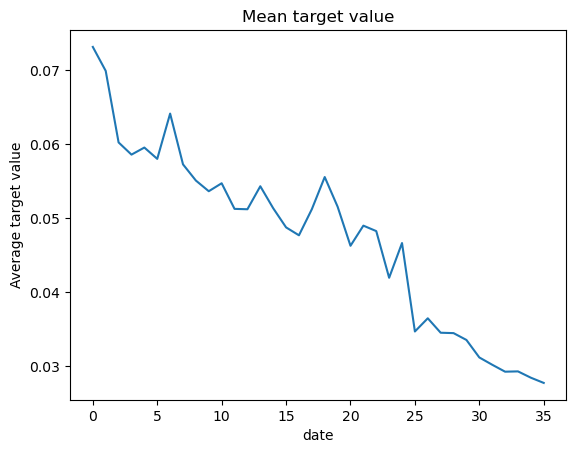

In [54]:
y_train.groupby('date')['target_r3'].mean().plot()
plt.ylabel('Average target value')
plt.title('Mean target value')

## Feature Clusters

In [55]:
import seaborn as sns

Text(0.5, 1.0, 'Features covariance')

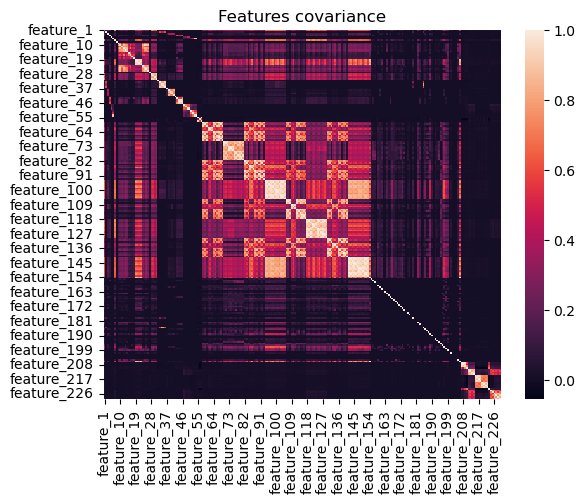

In [56]:
sns.heatmap(X_train[X_train['date'] == 35].iloc[:, 2:].corr().fillna(0).astype(float))
plt.title('Features covariance')

## Correlation

In [57]:
from scipy.stats import pointbiserialr
from tqdm.notebook import tqdm
import sklearn
import matplotlib.pyplot as plt

In [58]:
df = pd.merge(X_train, y_train, on=['date','id'])

In [62]:
res = pd.DataFrame()
for c in tqdm(df.columns[:-100]):
    res[c] = pointbiserialr(df[c], df['target_r3'])

  0%|          | 0/132 [00:00<?, ?it/s]

/tmp/ipykernel_1743191/3626710595.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  res[c] = pointbiserialr(df[c], df['target_r3'])
/tmp/ipykernel_1743191/3626710595.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  res[c] = pointbiserialr(df[c], df['target_r3'])
/tmp/ipykernel_1743191/3626710595.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a 

Majority of features have a positive correlation to the target. Event driven.

Text(0.5, 1.0, 'Correlation of raw features and target')

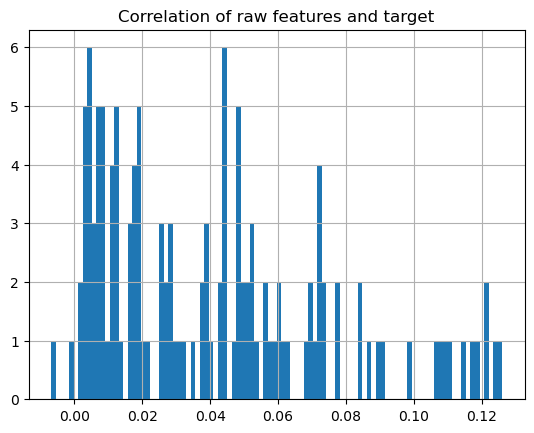

In [65]:
res.iloc[0,2:].hist(bins=100)
plt.title('Correlation of raw features and target')

## Correlation in Time

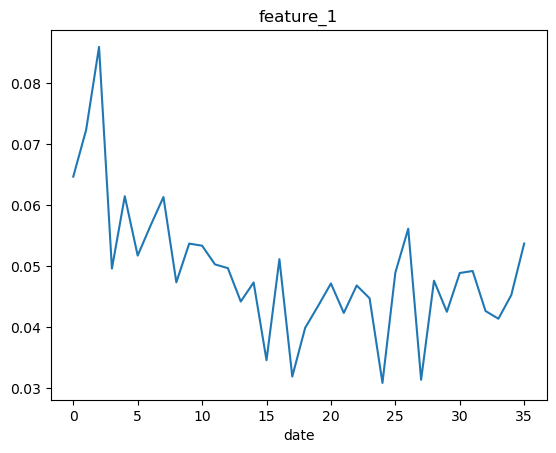

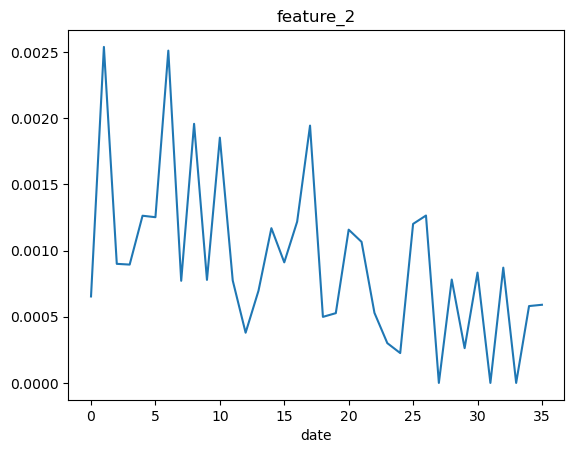

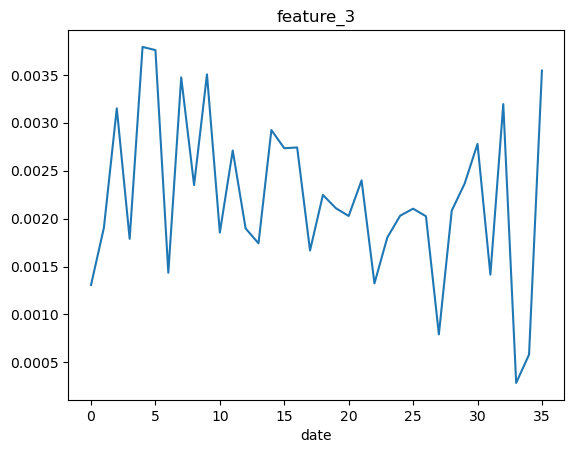

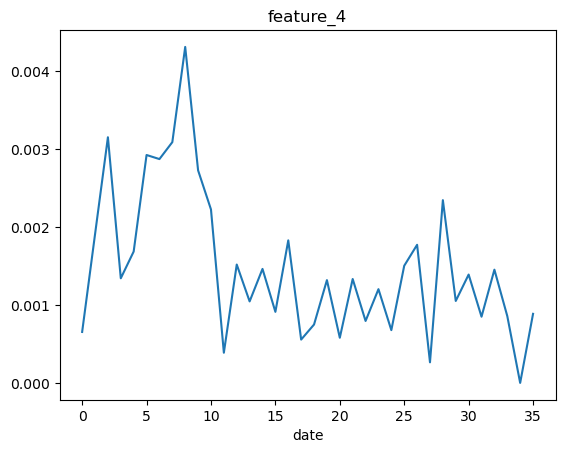

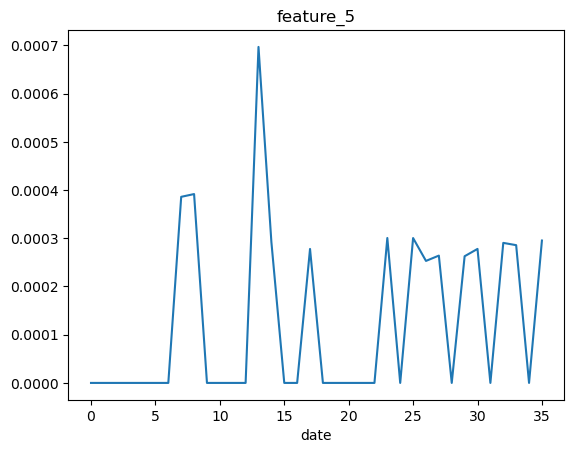

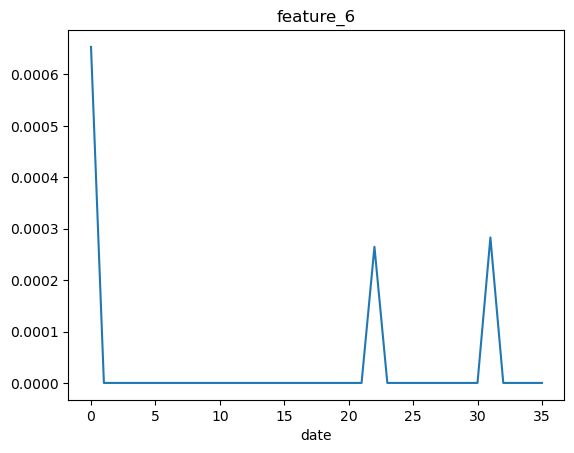

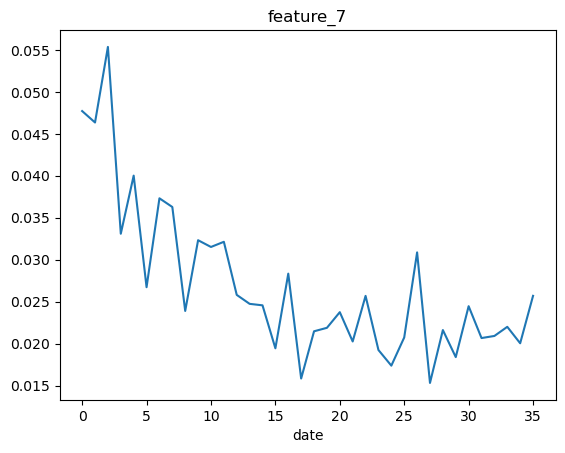

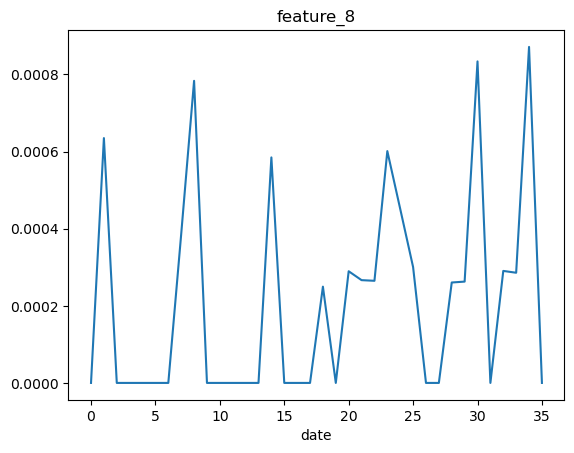

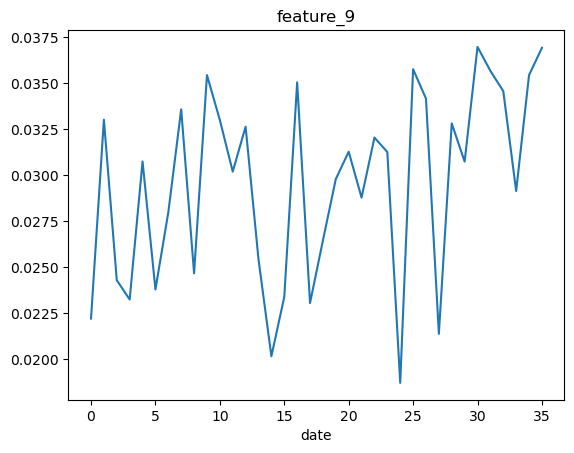

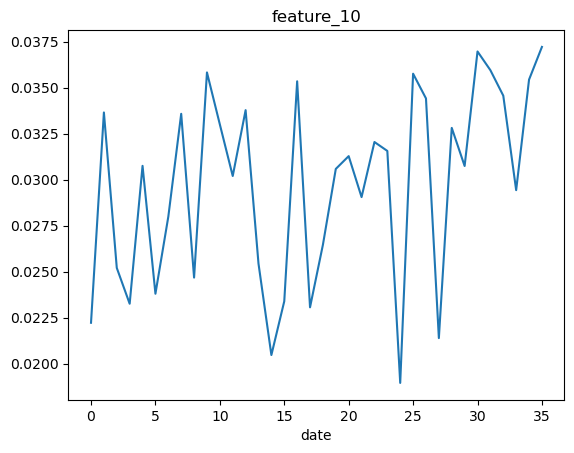

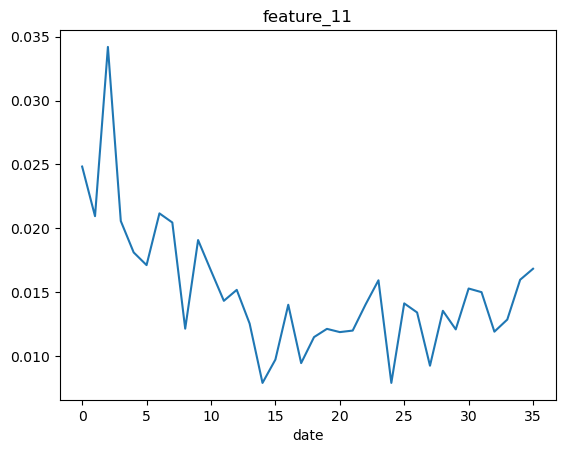

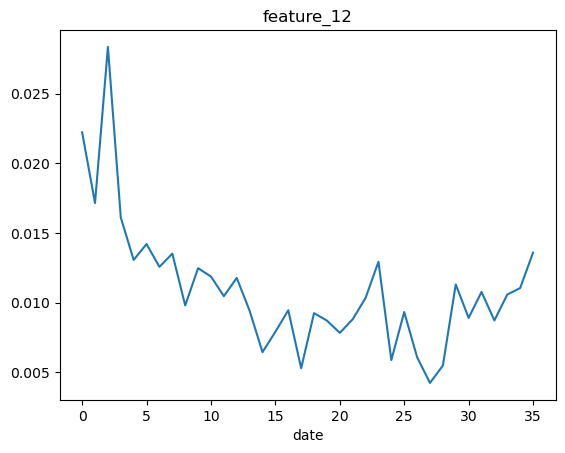

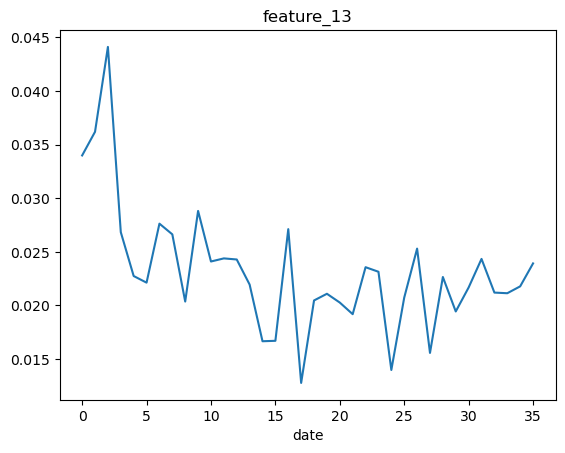

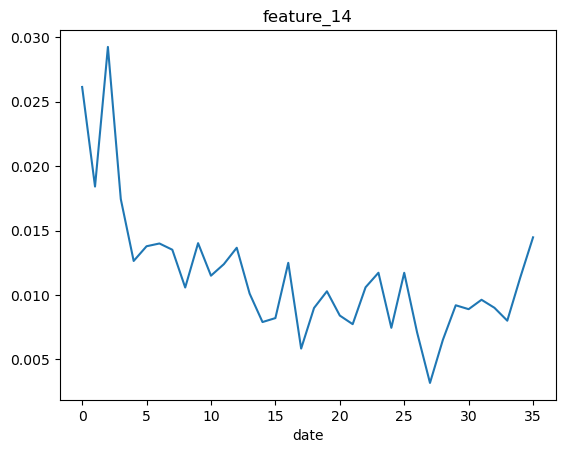

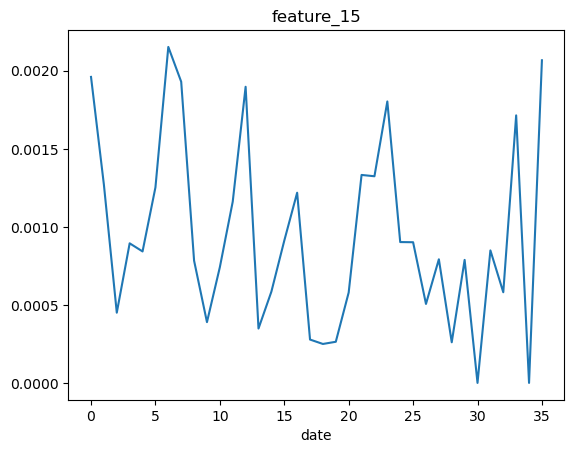

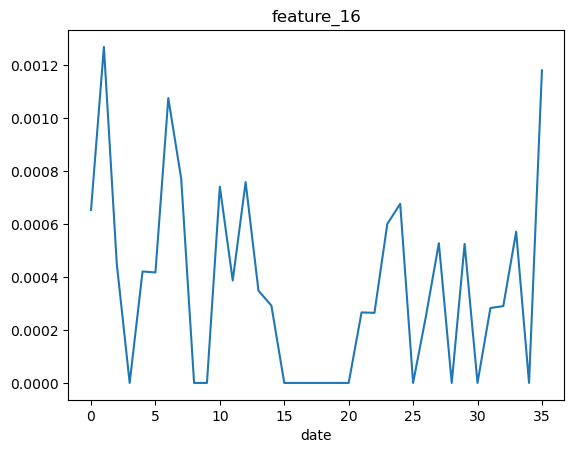

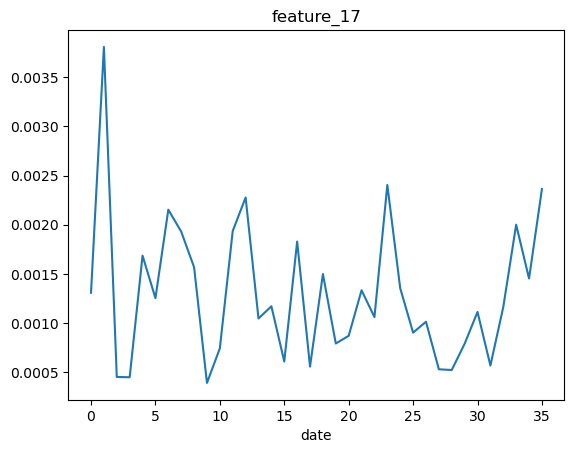

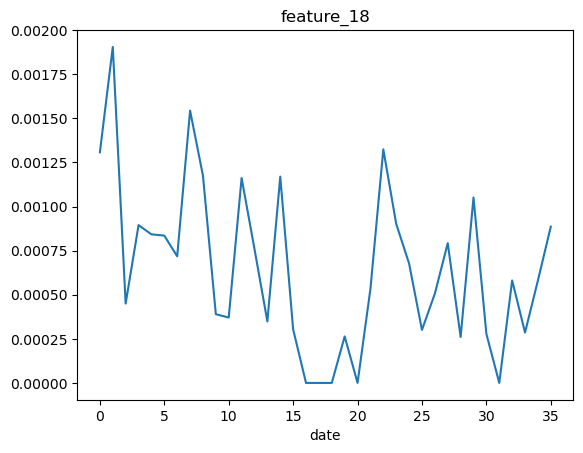

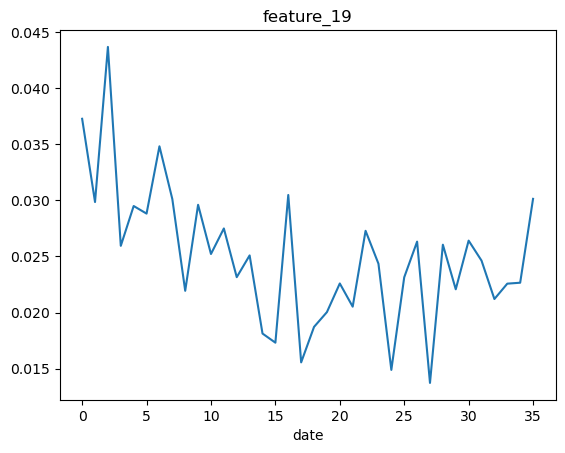

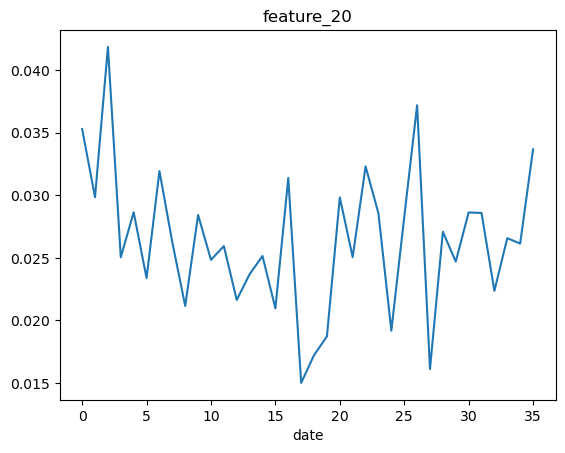

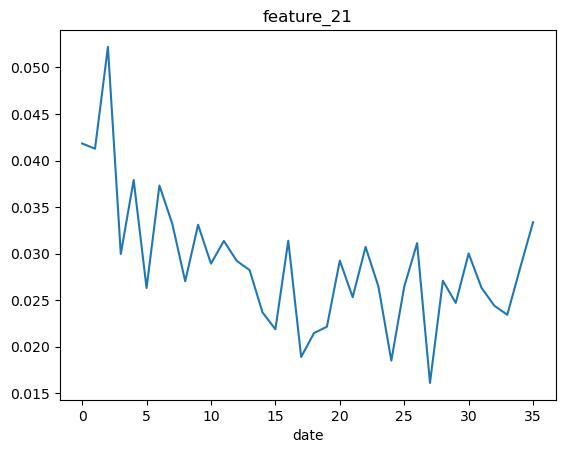

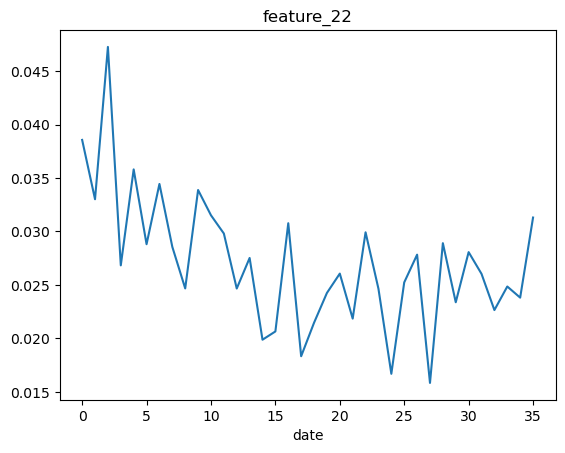

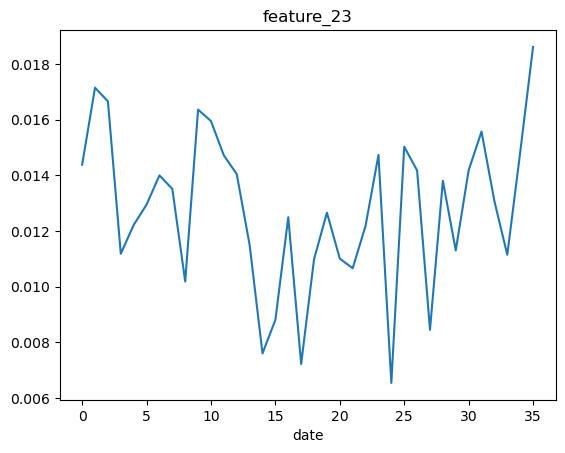

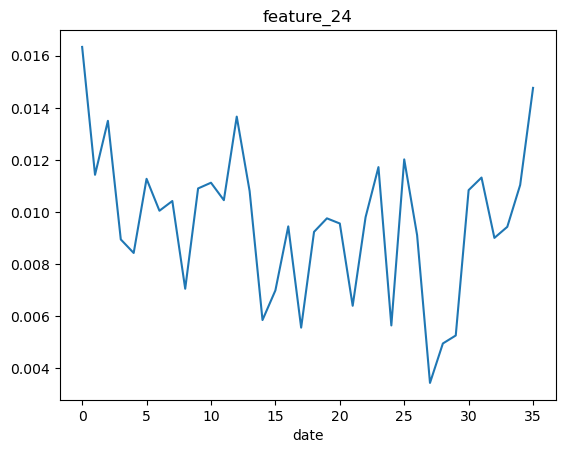

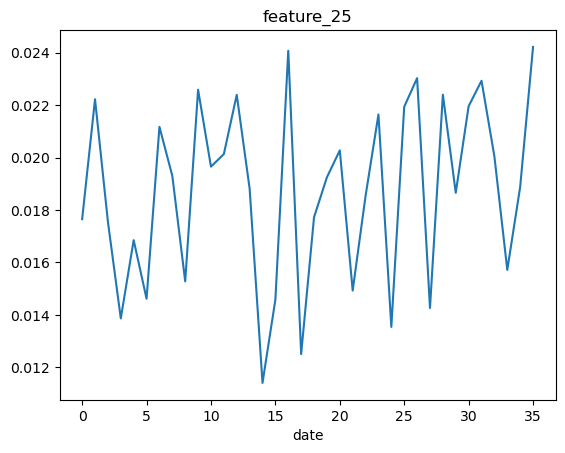

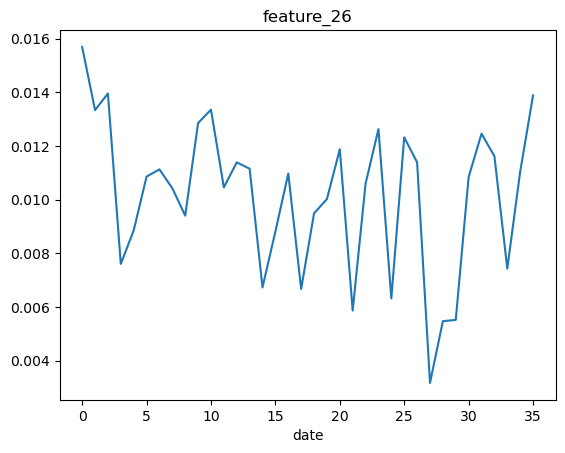

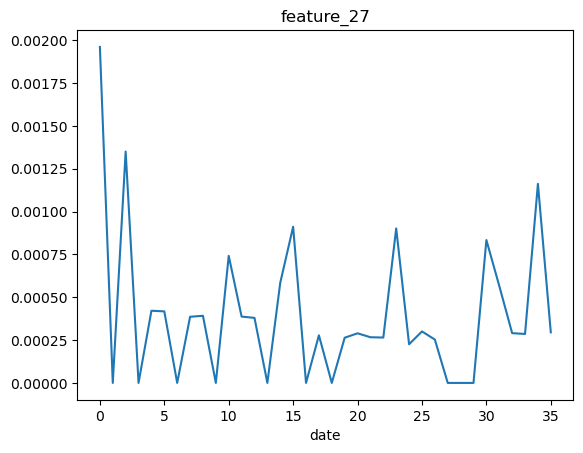

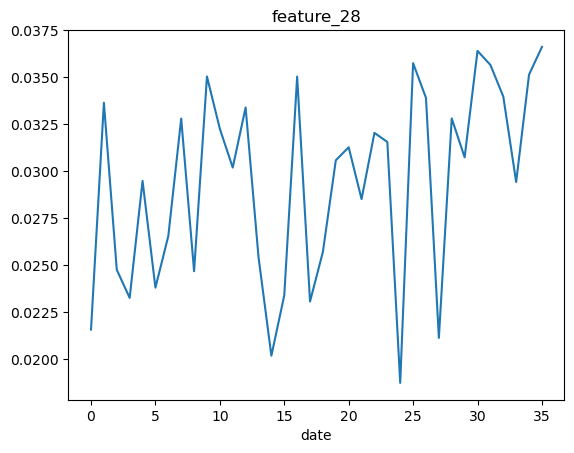

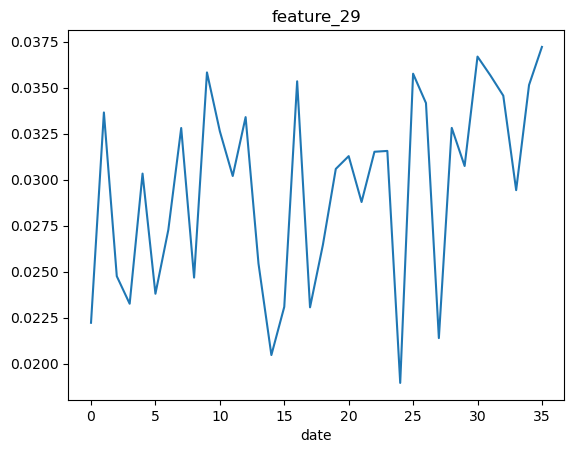

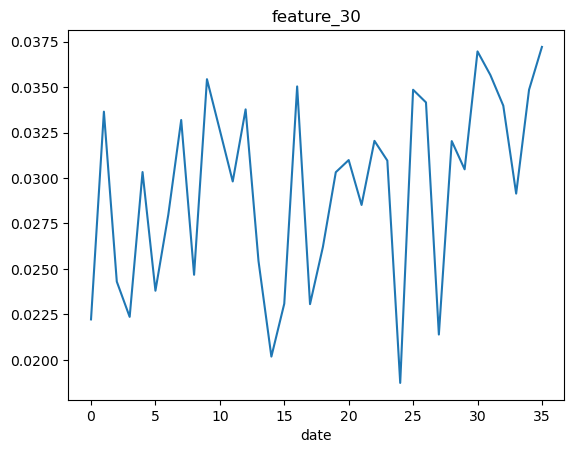

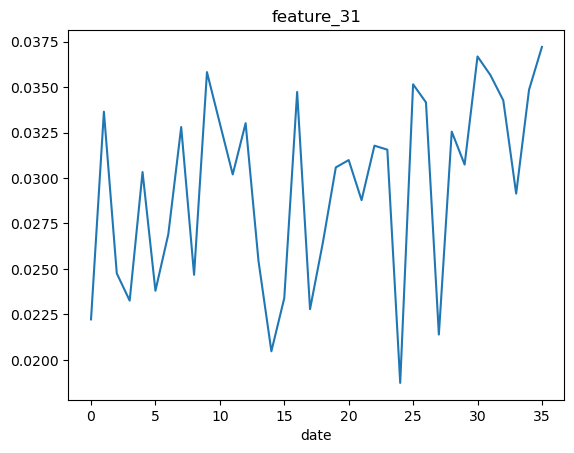

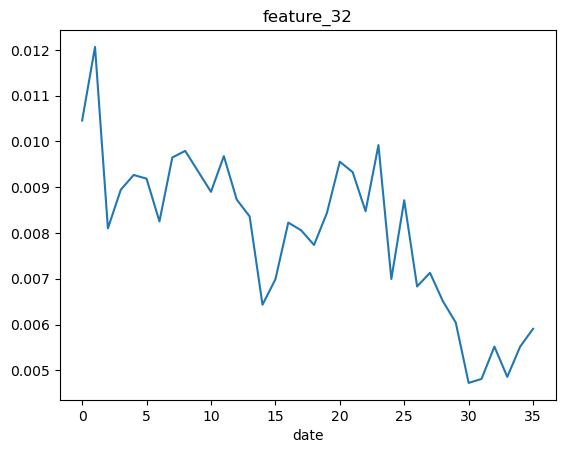

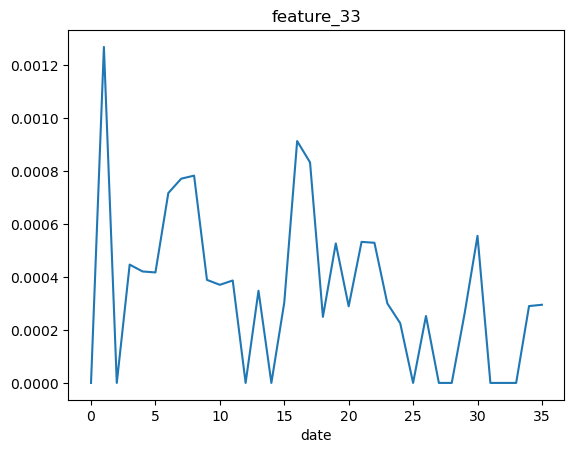

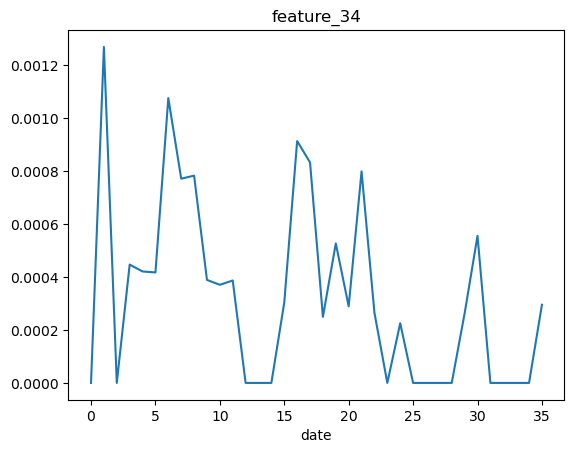

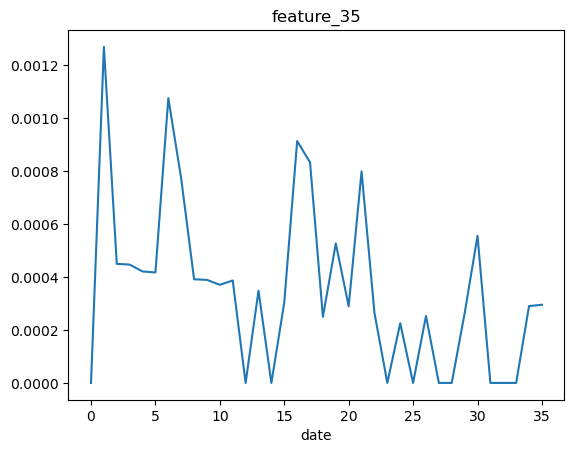

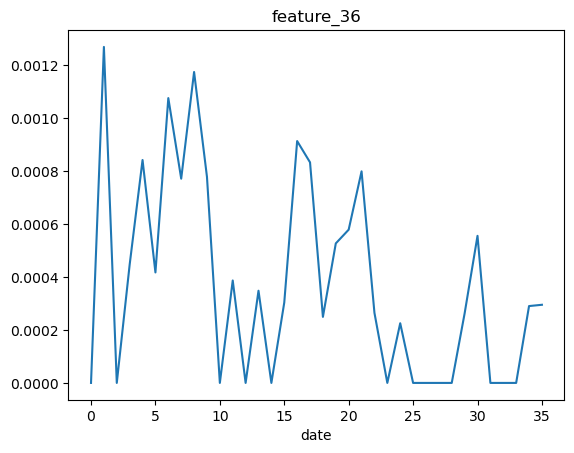

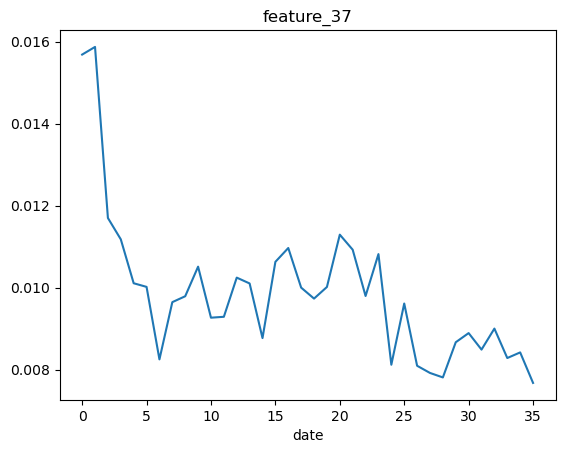

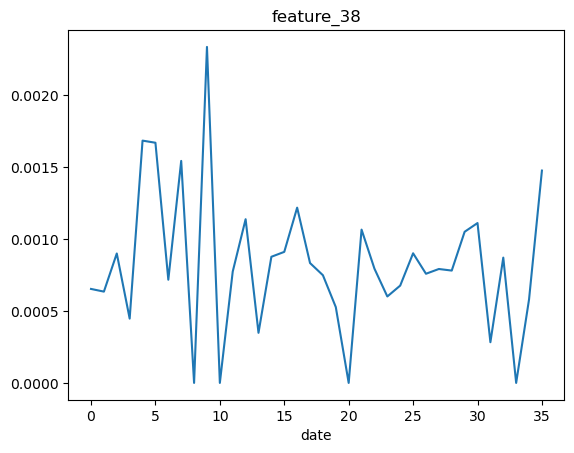

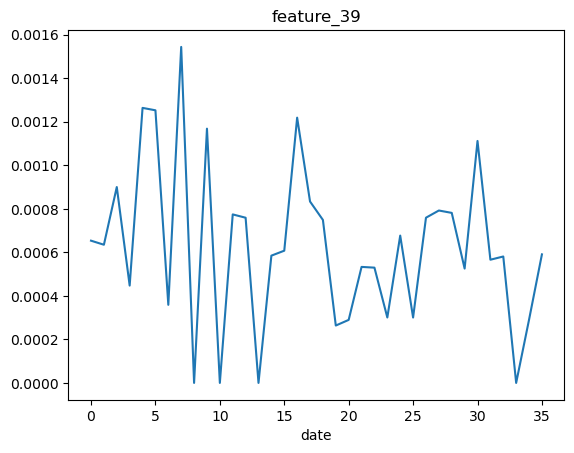

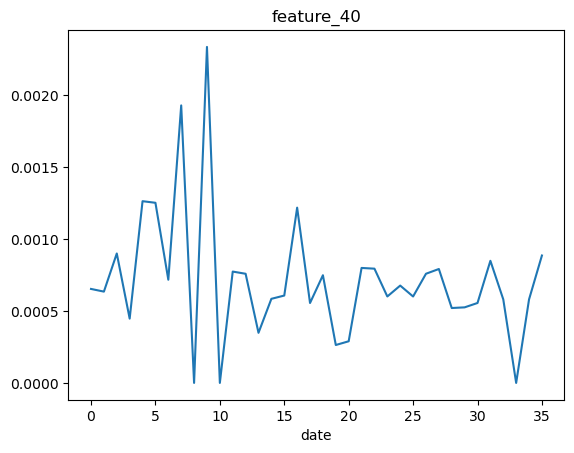

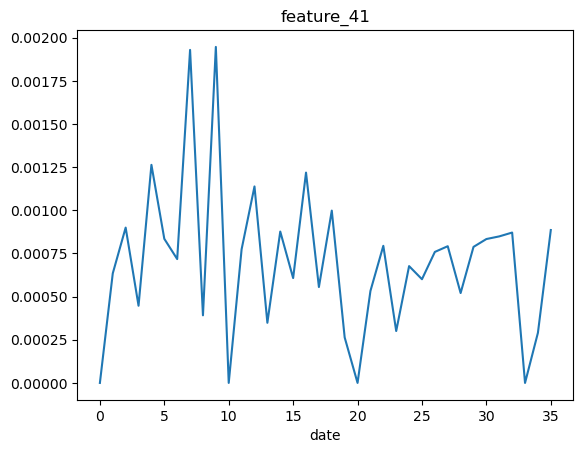

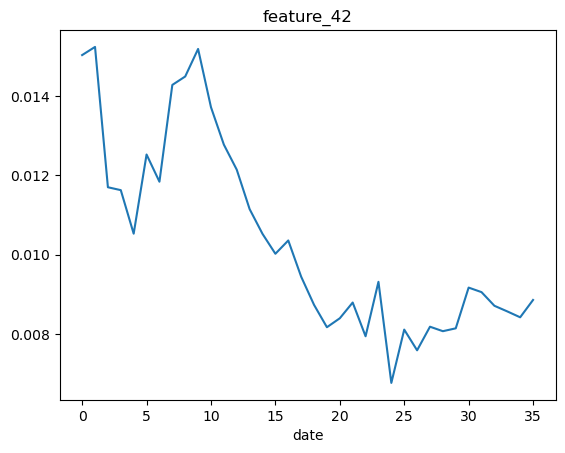

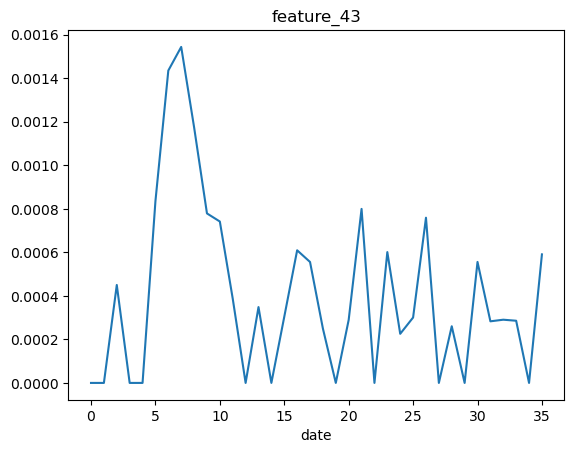

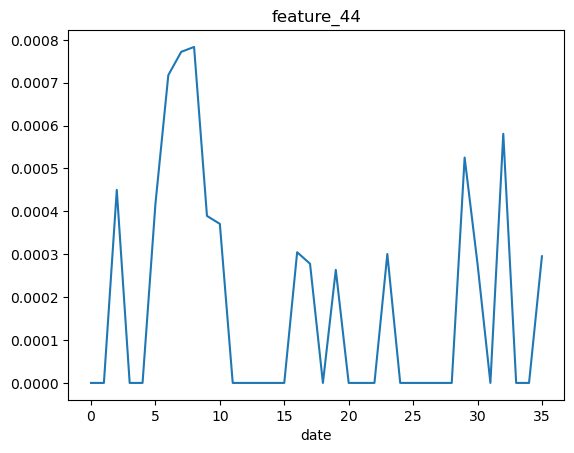

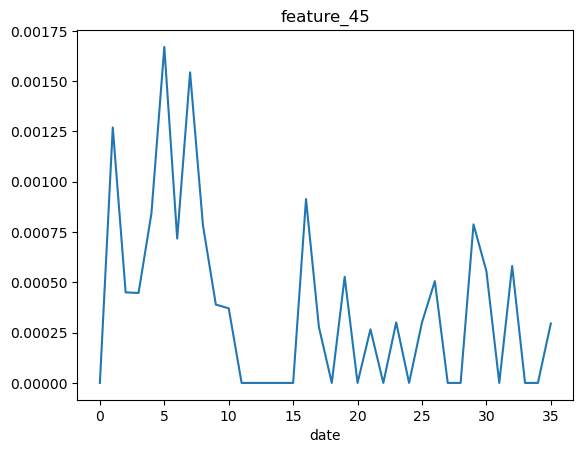

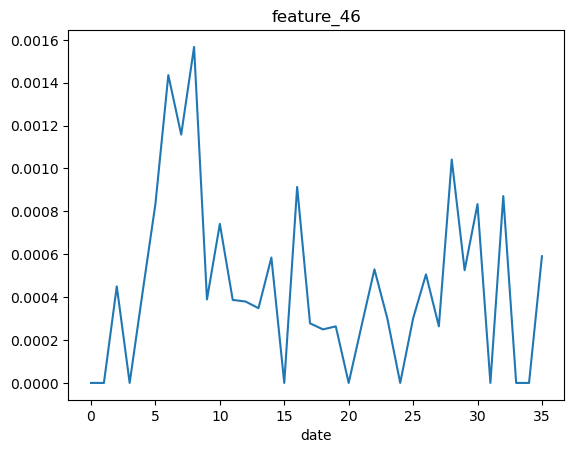

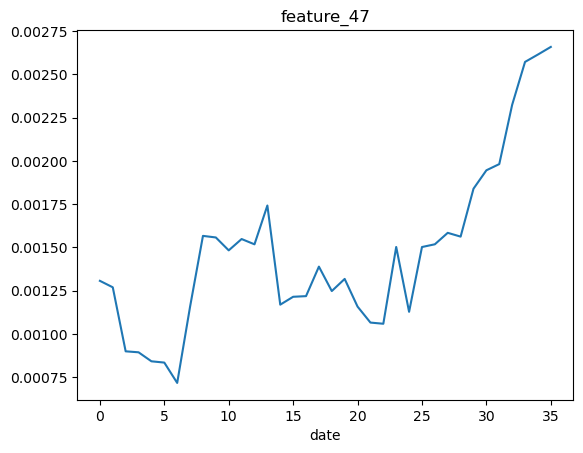

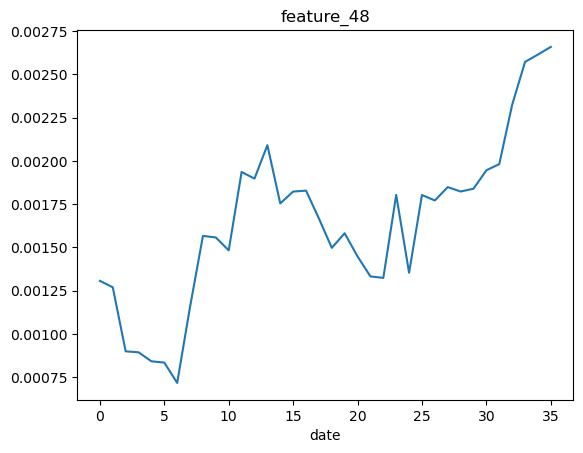

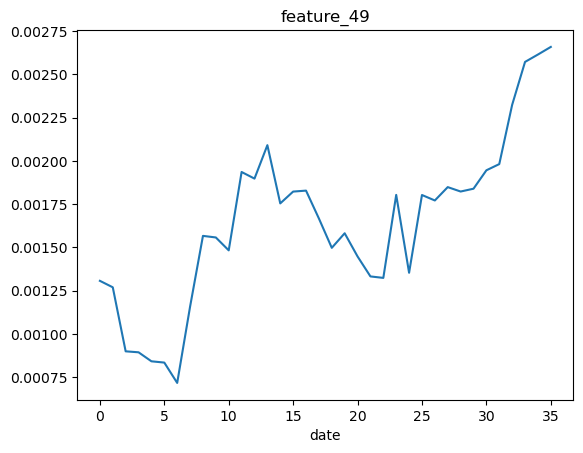

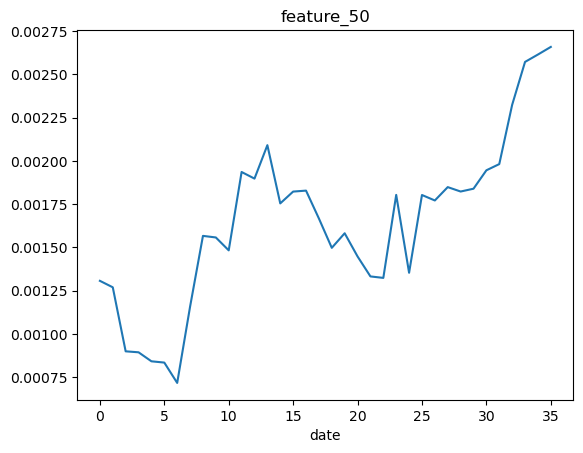

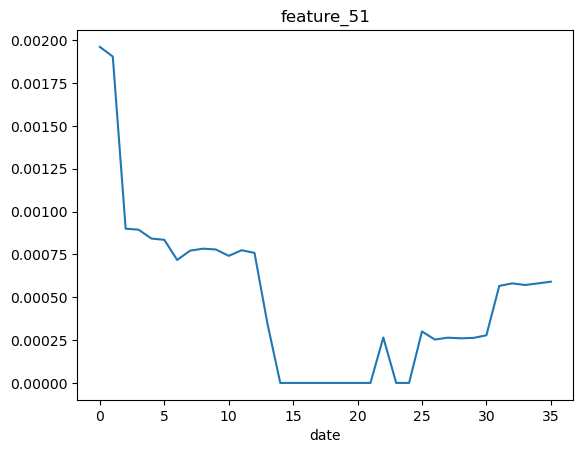

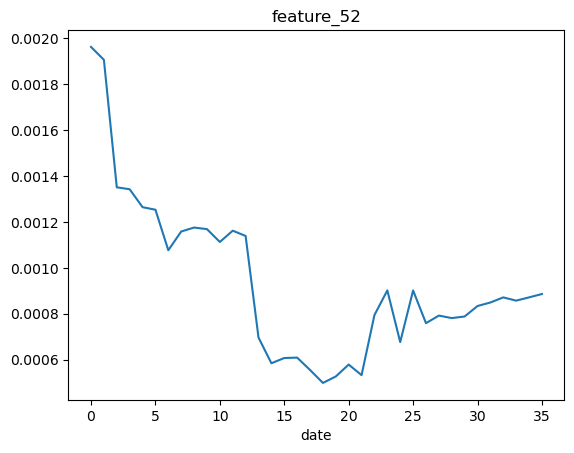

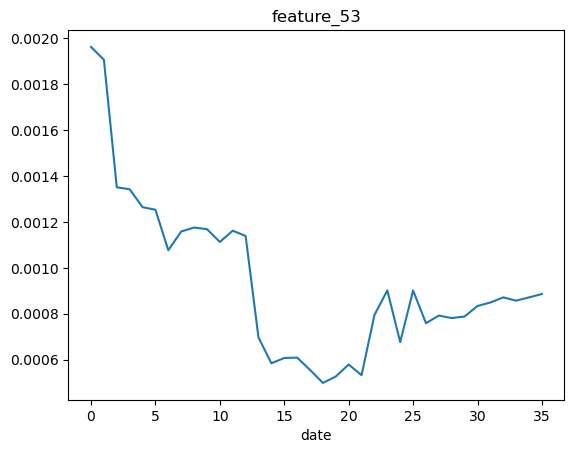

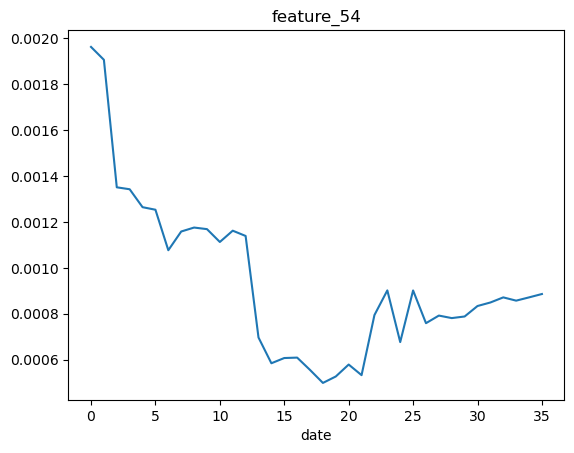

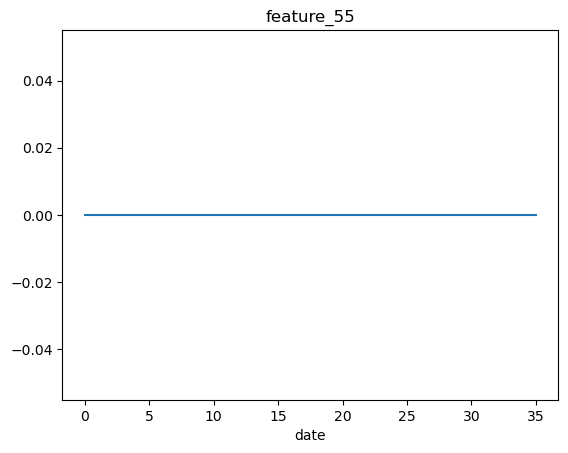

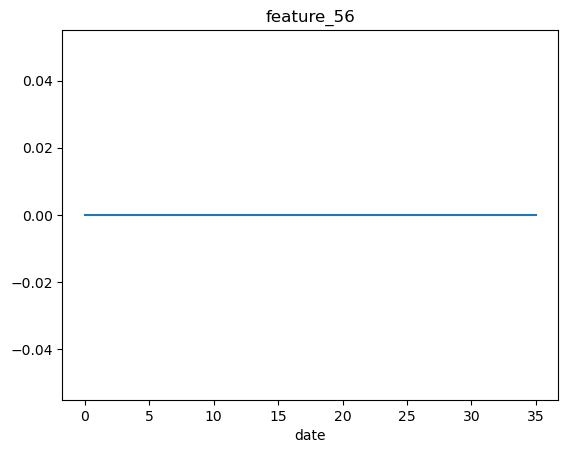

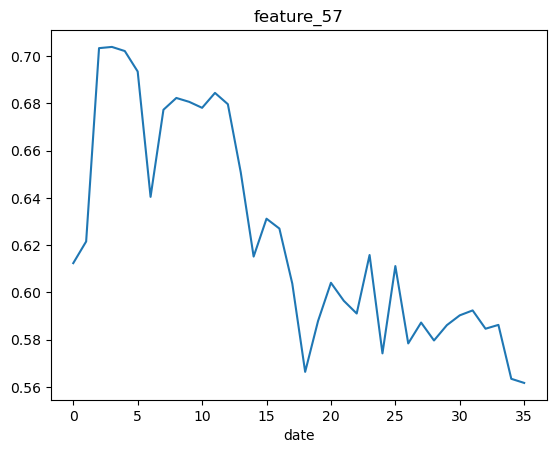

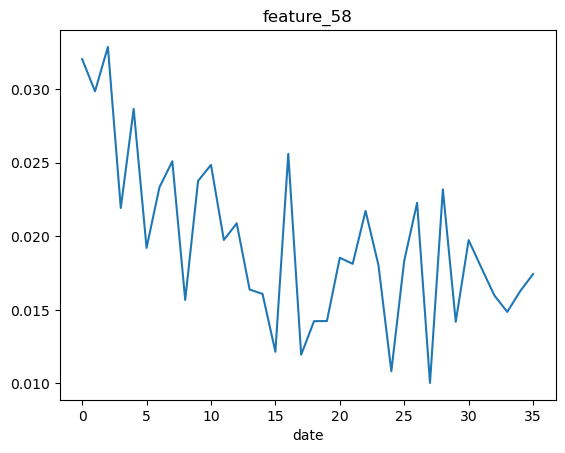

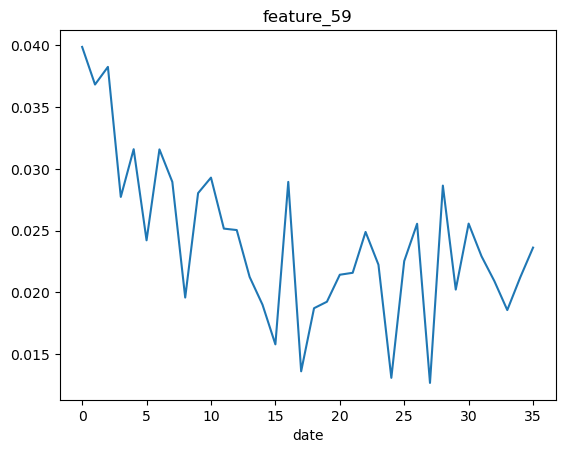

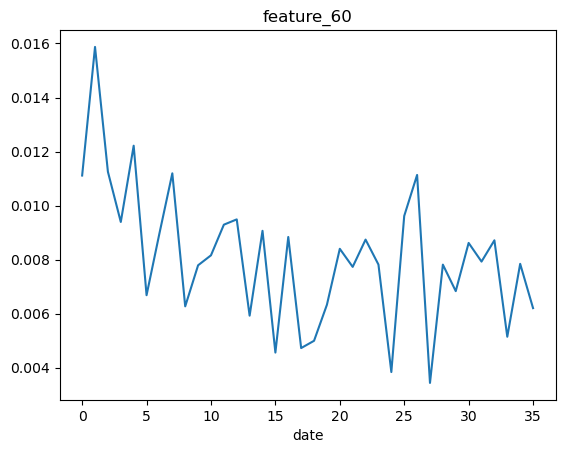

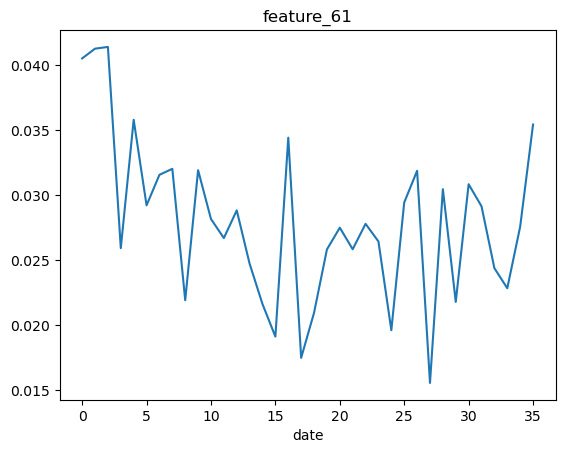

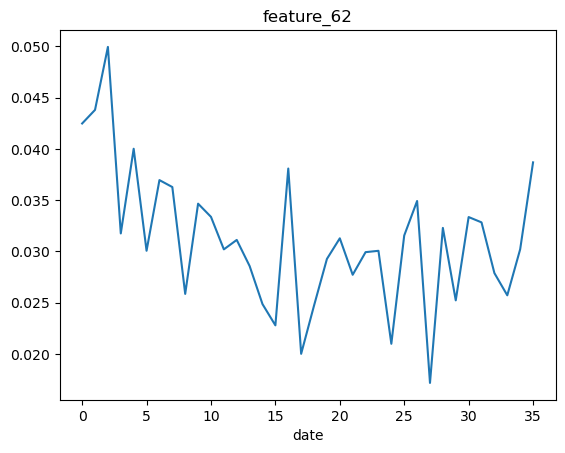

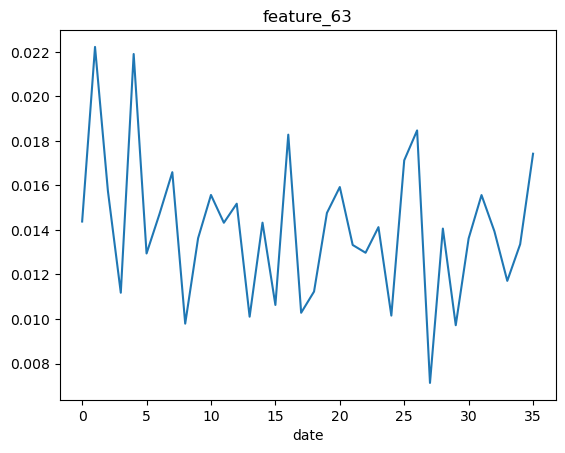

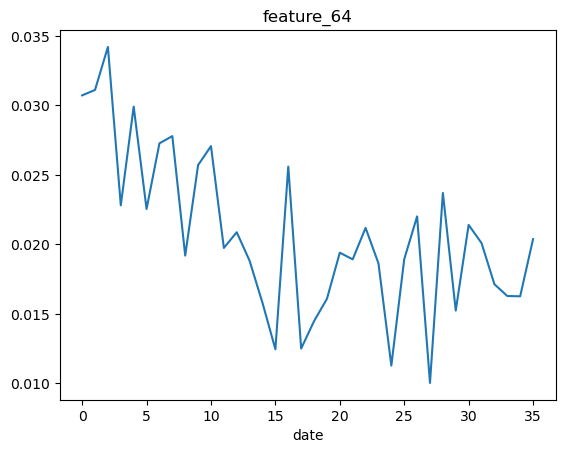

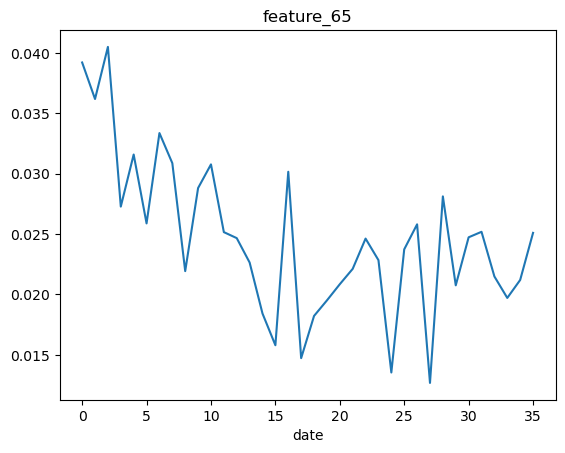

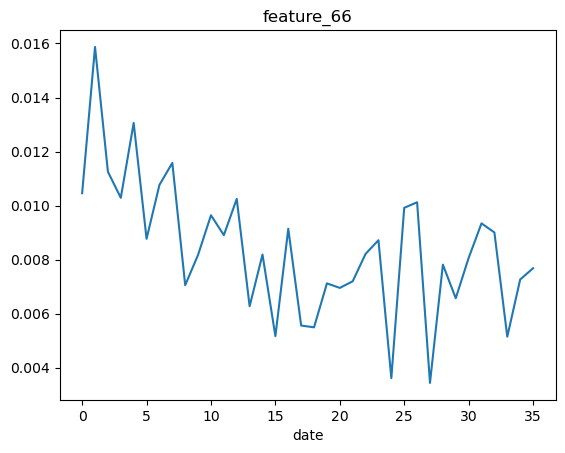

In [ ]:
for c in X_train.columns[2:]:
    df.groupby('date').apply(lambda x: sklearn.metrics.precision_score((x[c] > 0.5).astype(int), x.iloc[:, -1])).plot()
    plt.title(c)
    plt.show()